### 1.  Import Required Libraries
Import the necessary libraries, including NumPy, pandas, sklearn, seaborn, and matplotlib.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### 2.  Set Random Seed
Set the random seed for reproducibility using NumPy's random.seed function.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

### 3.  Generate Dummy Data
Generate dummy data for the independent and dependent variables.

In [3]:
# Generate dummy data
n = 29  # Number of datapoints
x = np.linspace(2, 12, n)  # Independent variable
y = 0.2 * x**2 + np.random.normal(0, 1.5, n)  # Dependent variable with Gaussian noise

### 4.  Create a DataFrame
Create a DataFrame from the dummy data and rename the columns with correct units.

In [4]:
# Create a DataFrame from the dummy data
data = pd.DataFrame({'Depth (m)': x, 'Pressure (MPa)': y})

# Rename the columns with correct units
data.columns = ['Depth (m)', 'Pressure (MPa)']

### 5.  Plot the Data
Plot the data using matplotlib's scatter function.

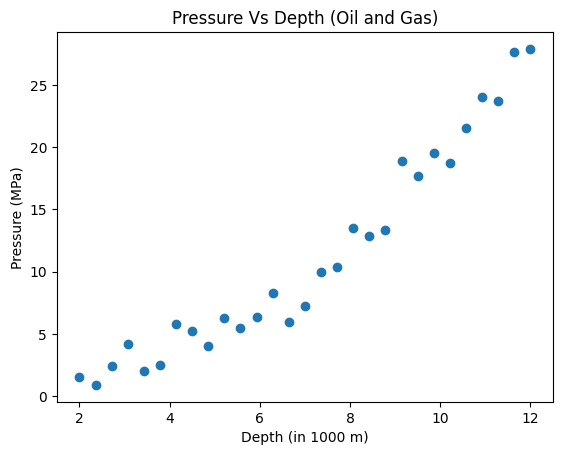

In [5]:
# Plot the data
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])  # Scatter plot of Depth vs Pressure
plt.xlabel('Depth (in 1000 m)')  # Label for x-axis
plt.ylabel('Pressure (MPa)')  # Label for y-axis
plt.title('Pressure Vs Depth (Oil and Gas)')  # Title of the plot
plt.show()  # Display the plot

### 6.  Create the Linear Regression Model
Create a linear regression model using sklearn's LinearRegression class.

In [6]:
# Create the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(data[['Depth (m)']], data['Pressure (MPa)'])

LinearRegression()

### 7.  Predict the Values
Predict the values using the predict method of the LinearRegression class.

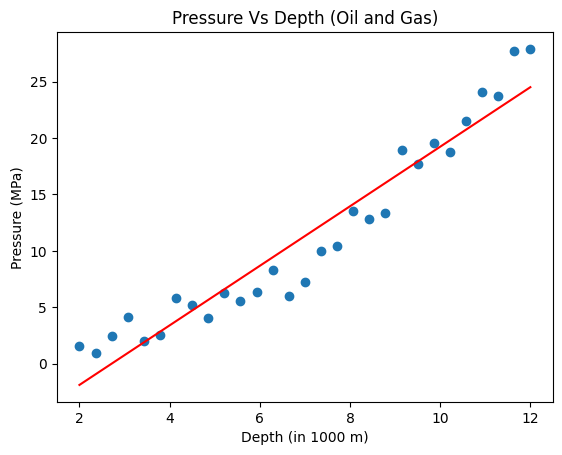

In [7]:
# Predict the values using the model
y_pred = model.predict(data[['Depth (m)']])

# Plot the data and the predicted line
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])  # Scatter plot of the original data
plt.plot(data['Depth (m)'], y_pred, color='red')  # Line plot of the predicted values
plt.xlabel('Depth (in 1000 m)')  # Label for x-axis
plt.ylabel('Pressure (MPa)')  # Label for y-axis
plt.title('Pressure Vs Depth (Oil and Gas)')  # Title of the plot
plt.show()  # Display the plot

#### Question: What does the red line represent in the plot?
#### Question: How well does the model fit the data? Justify your answer.

### 8.  Calculate Mean Squared Error (MSE)
Calculate the Mean Squared Error (MSE) using sklearn's mean_squared_error function.

In [8]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(data['Pressure (MPa)'], y_pred)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 5.255096462475615


### 9.  Calculate Root Mean Squared Error (RMSE)
Calculate the Root Mean Squared Error (RMSE) using NumPy's sqrt function.

In [9]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the RMSE
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.292399716994315


#### Question: What is the difference between Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)?
#### Question: Why do we use RMSE instead of MSE in some cases?

### 10.  Calculate Mean Absolute Error (MAE)
Calculate the Mean Absolute Error (MAE) using sklearn's mean_absolute_error function.

In [11]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(data['Pressure (MPa)'], y_pred)

# Print the MAE
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.9341815362909285


### 11.  Predict Pressure at a Specific Depth
Predict the pressure at a specific depth using the predict method of the LinearRegression class.
#### TODO: Change depth to different values (between 2 to 12) to Predict for: 

In [12]:
# Define the depth at which we want to predict the pressure
depth = 7

# Create a DataFrame with this depth
depth_df = pd.DataFrame([depth], columns=['Depth (m)'])  # Use 'Depth (m)' as the column name

# Use the model to predict the pressure at this depth
pressure_pred = model.predict(depth_df)

# Print the predicted pressure
print("Predicted Pressure (MPa):", pressure_pred[0])

Predicted Pressure (MPa): 11.308849813693364


### 12.  Plot the prediction point, prediction line with dashed lines.


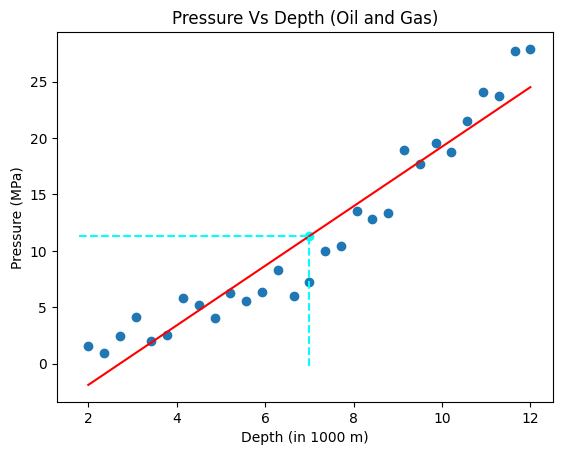

In [13]:
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.plot(data['Depth (m)'], y_pred, color='red')
plt.scatter(depth, pressure_pred, color='cyan')
plt.plot([depth, depth], [-0.2, float(pressure_pred)], color='cyan', linestyle='dashed')
plt.plot([1.8, depth], [pressure_pred, pressure_pred], color='cyan', linestyle='dashed')
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Pressure Vs Depth (Oil and Gas)')
plt.show()

### 13.  Fit the Polynomial Regression Model
Fit the polynomial regression model using sklearn's PolynomialFeatures class and the fit_transform method.

In [14]:
# Create Polynomial Features
poly = PolynomialFeatures(degree=2)  # Degree 2 for quadratic
X_poly = poly.fit_transform(data[['Depth (m)']])

# Fit the Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_poly, data['Pressure (MPa)'])

LinearRegression()

### 14.  Predict the Values with Polynomial Regression
Predict the values with polynomial regression using the predict method of the LinearRegression class.

In [15]:
# Predict the values
y_poly_pred = poly_model.predict(X_poly)

### 15.  Plot the Data and the Polynomial Regression Line
Plot the data and the polynomial regression line using matplotlib's scatter and plot functions.

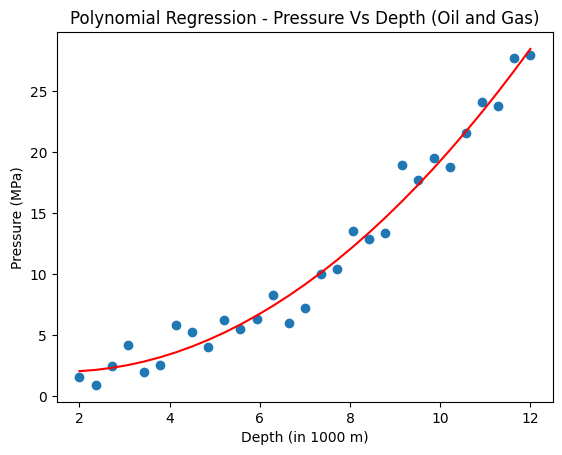

In [16]:
# Plot the data and the polynomial line
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.plot(sorted(data['Depth (m)']), y_poly_pred[np.argsort(data['Depth (m)'])], color='red')  # Sort values for line plot
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Polynomial Regression - Pressure Vs Depth (Oil and Gas)')
plt.show()

### 16.  Predict Pressure at a Specific Depth with Polynomial Regression
Predict the pressure at a specific depth with polynomial regression using the predict method of the LinearRegression class.
#### TODO: Change depth to different values (between 2 to 12) to Predict for: 

In [17]:
# Define the depth at which we want to predict the pressure
depth = 7

# Create a DataFrame with this depth
depth_df = pd.DataFrame([depth], columns=['Depth (m)'])  # Use 'Depth (m)' as the column name

# Transform the depth to polynomial features
depth_poly = poly.transform(depth_df)

# Use the polynomial model to predict the pressure at this depth
pressure_poly_pred = poly_model.predict(depth_poly)

# Print the predicted pressure
print("Predicted Pressure (MPa) at depth", depth, ":", pressure_poly_pred[0])


Predicted Pressure (MPa) at depth 7 : 9.129511183376714


### 17.  Plot the prediction point, prediction line with dashed lines.


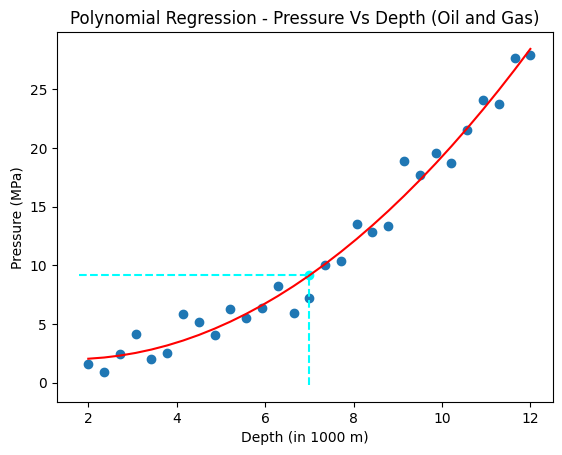

In [40]:
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.plot(sorted(data['Depth (m)']), y_poly_pred[np.argsort(data['Depth (m)'])], color='red')  # Sort values for line plot
plt.scatter(depth, pressure_poly_pred, color='cyan')
plt.plot([depth, depth], [-0.2, float(pressure_poly_pred)], color='cyan', linestyle='dashed')
plt.plot([1.8, depth], [pressure_poly_pred, pressure_poly_pred], color='cyan', linestyle='dashed')
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Polynomial Regression - Pressure Vs Depth (Oil and Gas)')
plt.show()

### 18.  Calculate Mean Squared Error (MSE) for Polynomial Model
Calculate the Mean Squared Error (MSE) for the polynomial model using sklearn's mean_squared_error function.

In [18]:
# Calculate Mean Squared Error (MSE) for poly_model
mse_poly = mean_squared_error(data['Pressure (MPa)'], y_poly_pred)
# Print the MSE
print(f"Mean Squared Error: {mse_poly}")

Mean Squared Error: 1.4690530181906527


### 19.  Calculate Root Mean Squared Error (RMSE) for Polynomial Model
Calculate the Root Mean Squared Error (RMSE) for the polynomial model using NumPy's sqrt function.

In [19]:
# Calculate Root Mean Squared Error (RMSE) for poly_model
rmse_poly = np.sqrt(mse_poly)
rmse_poly

1.2120449736666759

### 20.  Calculate Mean Absolute Error (MAE) for Polynomial Model
Calculate the Mean Absolute Error (MAE) for the polynomial model using sklearn's mean_absolute_error function.

In [20]:
mae_poly = mean_absolute_error(data['Pressure (MPa)'], y_poly_pred)
mae_poly

1.0017164621977634

### 21.  Print All Errors for Polynimial Regression


In [21]:
print("Mean Squared Error (MSE) for poly_model:", mse_poly)
print("Root Mean Squared Error (RMSE) for poly_model:", rmse_poly)
print("Mean Absolute Error (MAE) for poly_model:", mae_poly)

Mean Squared Error (MSE) for poly_model: 1.4690530181906527
Root Mean Squared Error (RMSE) for poly_model: 1.2120449736666759
Mean Absolute Error (MAE) for poly_model: 1.0017164621977634
